In [5]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("stringr")
install.packages("ggplot2")
install.packages("forcats")
install.packages("here")
install.packages("formatR")
install.packages("readr")
install.packages('rsample')
install.packages('plotROC')
install.packages('glmnet')
install.packages('glmnetUtils')
install.packages('yardstick')
install.packages("ggvoronoi")
install.packages("viridis")
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [6]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(dplyr)
library(stringr)
library(ggplot2)
library(forcats)
library(here)
library(formatR)
library(readr)
library(rsample)
library(plotROC)
library(glmnet)
library(glmnetUtils)
library(yardstick)
library(ggvoronoi)
library(viridis)
library(ggcorrplot)
library(ggthemes)

here() starts at /content

Loading required package: Matrix

Loaded glmnet 4.1-3


Attaching package: ‘glmnetUtils’


The following objects are masked from ‘package:glmnet’:

    cv.glmnet, glmnet


For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec


Loading required package: viridisLite



In [8]:
options(scipen = 100)

In [29]:
tracking18<-read_csv("/content/sample_data/tracking2018.csv")
tracking19<-read_csv("/content/sample_data/tracking2019.csv")
tracking20<-read_csv("/content/sample_data/tracking2020.csv")

Rows: 1413287 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): event, displayName, position, team, playDirection
dbl  (12): x, y, s, a, dis, o, dir, nflId, jerseyNumber, frameId, gameId, pl...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1413079 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): event, displayName, position, team, playDirection
dbl  (12): x, y, s, a, dis, o, dir, nflId, jerseyNumber, frameId, gameId, pl...
dttm  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1418671 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5):

In [30]:
scout.data<-read_csv("/content/sample_data/PFFScoutingData.csv")
games<- read_csv("/content/sample_data/games.csv")
players<- read_csv("/content/sample_data/players.csv")
plays<- read_csv("/content/sample_data/plays.csv")


Rows: 19979 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): snapDetail, kickType, kickDirectionIntended, kickDirectionActual, ...
dbl  (5): gameId, playId, snapTime, operationTime, hangTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 764 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): gameDate, homeTeamAbbr, visitorTeamAbbr
dbl  (3): gameId, season, week
time (1): gameTimeEastern

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2732 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): height, birthDate, collegeName, Position, displayName
dbl (2): nflId, weight

ℹ

Now that the data is in, let's inspect it.

In [31]:
head(tracking18)

time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2018-12-30 21:25:32,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470,Justin Tucker,9,K,home,1,2018123000,36,right
2018-12-30 21:25:32,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470,Justin Tucker,9,K,home,2,2018123000,36,right
2018-12-30 21:25:32,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470,Justin Tucker,9,K,home,3,2018123000,36,right
2018-12-30 21:25:32,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470,Justin Tucker,9,K,home,4,2018123000,36,right
2018-12-30 21:25:32,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470,Justin Tucker,9,K,home,5,2018123000,36,right
2018-12-30 21:25:32,43.26,28.05,4.98,1.07,0.50,136.68,122.28,None,39470,Justin Tucker,9,K,home,6,2018123000,36,right


In [32]:
dim(tracking18)
dim(tracking19)
dim(tracking20)
dim(plays)
dim(scout.data)
dim(players)
dim(games)

[1] 1413287      18

[1] 1413079      18

[1] 1418671      18

[1] 19979    25

[1] 19979    20

[1] 2732    7

[1] 764   7

In [33]:
sort(colSums(is.na(tracking18)))

time             x             y             s             a 
            0             0             0             0             0 
          dis         event   displayName          team       frameId 
            0             0             0             0             0 
       gameId        playId playDirection             o           dir 
            0             0             0         61437         61437 
        nflId  jerseyNumber      position 
        61437         61437         61437

It appears we have 61,437 NA values under the o(orientation), dir(angle of player motion), nflid(player identification number), jerseyNumber(player jersy #), position(player position group) columns. 

In [34]:
table(tracking18[is.na(tracking18$nflId), "displayName"])


football 
   61437 

After some exploration, it turns out that the observations are coming from the football being tracked rather than the player. We will remove those now. 

In [35]:
## 2018 

kick18 <- tracking18 %>% 
  # Filtering so the football is removed
  filter(displayName != "football") %>% 
  
  # Grouping by gameId and playId
  group_by(gameId, playId) %>% 
  
  arrange(gameId, playId, frameId) %>% 
  
  # Filtering so we only see the frames of the kickoff and kick received
  filter(event == 'kick_received' | event  == 'kickoff') 

## 2019 

kick19 <- tracking19 %>% 
  # Filtering so the football is removed
  filter(displayName != "football") %>% 
  
  # Grouping by gameId and playId
  group_by(gameId, playId) %>% 
  
  arrange(gameId, playId, frameId) %>% 
  
  # Filtering so we only see the frames of the kickoff and kick received
  filter(event == 'kick_received' | event  == 'kickoff') 

## 2020

kick20 <- tracking20 %>% 
  # Filtering so the football is removed
  filter(displayName != "football") %>% 
  
  # Grouping by gameId and playId
  group_by(gameId, playId) %>% 
  
  arrange(gameId, playId, frameId) %>% 
  
  # Filtering so we only see the frames of the kickoff and kick received
  filter(event == 'kick_received' | event  == 'kickoff') 

# Removing the redundant datasets
rm(tracking18, tracking19, tracking20)

head(kick18)

time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2018-12-22 21:30:34,75.60,24.52,4.88,2.61,0.50,291.39,286.36,kickoff,34707,Ryan Succop,4,K,home,11,2018122200,37,left
2018-12-22 21:30:34,76.07,2.71,1.03,2.16,0.09,219.74,278.00,kickoff,35575,Kendrick Lewis,28,FS,home,11,2018122200,37,left
2018-12-22 21:30:34,60.17,6.83,1.92,3.05,0.17,326.49,291.12,kickoff,38543,Michael Floyd,17,WR,away,11,2018122200,37,left
2018-12-22 21:30:34,75.63,16.09,2.18,3.66,0.20,265.38,275.08,kickoff,40248,Daren Bates,53,ILB,home,11,2018122200,37,left
2018-12-22 21:30:34,75.64,13.05,1.76,3.26,0.16,262.58,284.68,kickoff,40326,Will Compton,51,ILB,home,11,2018122200,37,left
2018-12-22 21:30:34,75.70,32.78,2.19,2.49,0.23,265.26,256.88,kickoff,40473,Brynden Trawick,41,FS,home,11,2018122200,37,left


Now, let's combine the 2018-202 tracking data with the plays and scout data. I am filtering kickoff plays only so I will be removing the onside, squib, and punts. This will be stored as kickoffs. 

In [36]:
kicks <- rbind(kick18, kick19, kick20)

#Removing redundancies 
rm(kick18, kick19, kick20)

# Combining our plays data with our tracking(kicks) data
kick_plays <- inner_join(x = kicks,
                         y = plays, 
                         by = c('gameId', 'playId'))

# Combining our tracking and plays data with our PFF Scounting Data
kick_plays_PFF <- inner_join(x = kick_plays, 
                             y = scout.data, 
                             by  = c('gameId', 'playId'))

# Filtering out only the kickoff play type  
kickoffs <- kick_plays_PFF %>% 
  filter(specialTeamsPlayType ==  'Kickoff') %>% 
  # We are going to keep deep, flat, and pooch kicks
  filter(kickType == 'D' | kickType == 'F' | kickType == 'P')

# Changing the character variables to factors
kickoffs <- as.data.frame(unclass(kickoffs),                     
                                  stringsAsFactors = TRUE)

rm(kick_plays, kick_plays_PFF, kick)
  
head(kickoffs)

Warning message in rm(kick_plays, kick_plays_PFF, kick):
“object 'kick' not found”


,time,x,y,s,a,dis,o,dir,event,nflId,⋯,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2018-12-22 21:30:34,75.60,24.52,4.88,2.61,0.50,291.39,286.36,kickoff,34707,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA
2,2018-12-22 21:30:34,76.07,2.71,1.03,2.16,0.09,219.74,278.00,kickoff,35575,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA
3,2018-12-22 21:30:34,60.17,6.83,1.92,3.05,0.17,326.49,291.12,kickoff,38543,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA
4,2018-12-22 21:30:34,75.63,16.09,2.18,3.66,0.20,265.38,275.08,kickoff,40248,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA
5,2018-12-22 21:30:34,75.64,13.05,1.76,3.26,0.16,262.58,284.68,kickoff,40326,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA
6,2018-12-22 21:30:34,75.70,32.78,2.19,2.49,0.23,265.26,256.88,kickoff,40473,⋯,R,NA,NA,TEN 28,8-0-2,NA,NA,TEN 28; TEN 36,NA,NA


In [37]:
#Summary Statistics
length(unique(kickoffs$playId))
length(unique(kickoffs$gameId))

[1] 695

[1] 87

In [38]:
summary(kickoffs)

      time                           x                y        
 Min.   :2018-12-22 21:30:34   Min.   :  0.00   Min.   :-2.00  
 1st Qu.:2018-12-30 21:38:41   1st Qu.: 44.32   1st Qu.:16.68  
 Median :2019-12-29 19:07:22   Median : 60.00   Median :26.87  
 Mean   :2020-01-01 03:43:06   Mean   : 60.05   Mean   :26.81  
 3rd Qu.:2020-12-27 20:06:37   3rd Qu.: 75.62   3rd Qu.:36.98  
 Max.   :2021-01-04 03:58:31   Max.   :119.94   Max.   :52.42  
                                                               
       s                a               dis               o         
 Min.   : 0.000   Min.   : 0.010   Min.   :0.0000   Min.   :  0.01  
 1st Qu.: 0.920   1st Qu.: 1.280   1st Qu.:0.0900   1st Qu.: 91.72  
 Median : 1.760   Median : 2.040   Median :0.1700   Median :177.40  
 Mean   : 2.908   Mean   : 2.086   Mean   :0.2882   Mean   :180.92  
 3rd Qu.: 4.350   3rd Qu.: 2.830   3rd Qu.:0.4400   3rd Qu.:271.07  
 Max.   :10.580   Max.   :10.810   Max.   :1.9400   Max.   :359.97  
     

In [39]:
#Dimensions of the X and Y Coordinates
min(kickoffs$x)
max(kickoffs$x)
min(kickoffs$y)
max(kickoffs$y)

[1] 0

[1] 119.94

[1] -2

[1] 52.42

## New Features

Here we are creating new features:

**yard_result**: The yard line the play results in, or the yard line the returner carried the ball to before being tackled. 

**YardResult_Over25**:  A binary indicator if the yard resulted in the 25 yard line or more.  The 25 yard line is where the ball is placed if the play result in a touchback.  

**kickto_yardline**: The yard line the ball was kicked to, or the yard line the player caught(or dropped) the ball

**Y_position**: The position the field a player is.  We categorize this into 4 locations:
left = left of the hash 
right = right of the hash 
center = in between the hashes 
out of bounds = not in the boundaries of the field 

**kickto_5yardBin**: The 5-yard bin that the ball was kicked to.  The yard_result variable is grouped into bin of 5 yards.  

**timestamp**: The time at a given frame in HH:MM:SS 

In [40]:
kickoffs <- kickoffs %>% 
         # Creating a variable for what yard line the play resulted at 
        # 
  mutate(yard_result = (100 - yardlineNumber) - playResult,
         
         # Creating a binary variable for if the ball reached the 25 yard line or not
         YardResult_over25 = ifelse(yard_result > 25 | yard_result == 25,'1','0'),
         
         # Creating a variable for which yard line the ball was kicked to
         kickedto_yardline = 100 - (yardlineNumber + kickLength),
         
         # Creating a variable for Y position on the field
         Y_position = ifelse(y < 23.36667 & y > 0, 'left', 
                      ifelse(y > 29.96667 & y < 53.3333, 'right',
                      ifelse(y > 23.36667 & y < 53.3333, 'center', 
                      ifelse(y < 0 | y > 53.3333, "out of bounds", 'NA')))),
         
         # Creating a variable for 5-yard bins
         kickedto_5yardBin =
           ifelse(kickedto_yardline >= -10 & -5 > kickedto_yardline, "back-half endzone",
           ifelse(kickedto_yardline >= -5 & 0 > kickedto_yardline, "front-half endzone", 
           ifelse(kickedto_yardline >= 0 & 5 > kickedto_yardline, "0-5",
           ifelse(kickedto_yardline >= 5 & 10 > kickedto_yardline, "5-10",
           ifelse(kickedto_yardline >= 10 & 15 > kickedto_yardline, "10-15", 
           ifelse(kickedto_yardline >= 15 & 20 > kickedto_yardline, "15-20",
           ifelse(kickedto_yardline >= 20 & 25 > kickedto_yardline, "20-25",
           ifelse(kickedto_yardline >= 25 & 30 > kickedto_yardline, "25-30",
           ifelse(kickedto_yardline >= 30 & 35 > kickedto_yardline, "30-35",
           ifelse(kickedto_yardline >= 35 & 40 > kickedto_yardline, "35-40",
           ifelse(kickedto_yardline >= 40 & 45 > kickedto_yardline, "40-45",
           ifelse(kickedto_yardline >= 45 & 50 > kickedto_yardline, "45-50",
           ifelse(kickedto_yardline >= 50 & 55 > kickedto_yardline, "50-55",
           ifelse(kickedto_yardline >= 55 & 60 > kickedto_yardline, "55-60",
           ifelse(kickedto_yardline >= 60 & 65 > kickedto_yardline, "60-65","NA")
           )))))))))))))))

# Changing variables to factors
kickoffs <- as.data.frame(unclass(kickoffs),                     
                                  stringsAsFactors = TRUE)

# Creating a variable for time
kickoffs$timestamp <- str_sub(kickoffs$time, - 12, - 1)

kickoffs$timestamp <- sub("T"," ",kickoffs$time)
kickoffs$timestamp <- strptime(kickoffs$timestamp, format = "%Y-%m-%d %H:%M:%OS", tz = "")

glimpse(kickoffs)

Rows: 27,889
Columns: 65
$ time                    <dttm> 2018-12-22 21:30:34, 2018-12-22 21:30:34, 201…
$ x                       <dbl> 75.60, 76.07, 60.17, 75.63, 75.64, 75.70, 60.5…
$ y                       <dbl> 24.52, 2.71, 6.83, 16.09, 13.05, 32.78, 35.11,…
$ s                       <dbl> 4.88, 1.03, 1.92, 2.18, 1.76, 2.19, 1.37, 0.84…
$ a                       <dbl> 2.61, 2.16, 3.05, 3.66, 3.26, 2.49, 2.29, 1.45…
$ dis                     <dbl> 0.50, 0.09, 0.17, 0.20, 0.16, 0.23, 0.13, 0.07…
$ o                       <dbl> 291.39, 219.74, 326.49, 265.38, 262.58, 265.26…
$ dir                     <dbl> 286.36, 278.00, 291.12, 275.08, 284.68, 256.88…
$ event                   <fct> kickoff, kickoff, kickoff, kickoff, kickoff, k…
$ nflId                   <dbl> 34707, 35575, 38543, 40248, 40326, 40473, 4275…
$ displayName             <fct> Ryan Succop, Kendrick Lewis, Michael Floyd, Da…
$ jerseyNumber            <dbl> 4, 28, 17, 53, 51, 41, 56, 22, 15, 44, 36, 34,…
$ position     

In [41]:
# Re-leveling the 5-Yard Bins so they are in order
kickoffs <- kickoffs %>% 
  mutate(kickedto_5yardBin = fct_relevel(kickedto_5yardBin, "back-half endzone", "front-half endzone", "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"))

levels(kickoffs$kickedto_5yardBin)

Warning message:
“Unknown levels in `f`: 25-30, 30-35, 35-40, 45-50, 50-55, 55-60”


[1] "back-half endzone"  "front-half endzone" "0-5"               
[4] "5-10"               "10-15"              "15-20"             
[7] "20-25"              "40-45"

In [42]:
# Creating a dataset named 'returns'
table(kickoffs$specialTeamsResult)

returns <- kickoffs %>% 
  filter(specialTeamsResult  == 'Return' | specialTeamsResult ==  'Muffed')

table(returns$specialTeamsResult)


   Fair Catch        Muffed Out of Bounds        Return     Touchback 
           22           220           110         15004         12533 


   Fair Catch        Muffed Out of Bounds        Return     Touchback 
            0           220             0         15004             0 

In [43]:
# Creating a new variable Opposing team because we eventually want to find the distance from the opposing players, not team players

# If a player is on the away team, lets return the home team, else, let's return away
returns$opp_team <- ifelse(returns$team == 'away', 'home', 'away')

# Sanity check
table(returns$opp_team == returns$team)

# Creating a data set for the moment of the ball being caught
received <- returns %>% 
  filter(event == 'kick_received')

# Joining returns2 onto itself where team = opp_team and creating 11 rows for each player with a defender added

receivedJoin <- left_join(received,
                     received[, c("gameId", "playId", "nflId", "displayName",                                             "opp_team", "x","y","s", "a", "dis")],
                     by = c("gameId" = "gameId", "playId" = "playId", "team" =                                      "opp_team"))

# Creating a variable for distance from returner or 'ball carrier'
receivedJoin$distance <- (((receivedJoin$x.x - receivedJoin$x.y)^2) + 
                       (receivedJoin$y.x - receivedJoin$y.y)^2)^.5

# Using filter to return the only the returner 
receivedJoin <- receivedJoin  %>% 
  filter(receivedJoin$nflId.x == receivedJoin$returnerId) 
  

# We are grabbing the 10 closest defenders because the kicker should be removed from the play when evaluating the kickoff team

# Average Yardline
# Average 
received10 <- receivedJoin %>% group_by(displayName.x, gameId, playId) %>% slice_min(distance, n = 5) %>% 
  # Creating average distance, speed, and acceleration variables
  mutate(KoTeamAvgX = mean(x.x),
         KoTeamAvgDist  = mean(distance),
         KoTeamAvgSpeed  = mean(s.y),
         KoTeamAvgA = mean(a.y))

glimpse(received10)


FALSE 
15224 

Rows: 1,715
Columns: 78
Groups: displayName.x, gameId, playId [343]
$ time                    <dttm> 2018-12-23 18:59:29, 2018-12-23 18:59:29, 201…
$ x.x                     <dbl> 107.31, 107.31, 107.31, 107.31, 107.31, 111.21…
$ y.x                     <dbl> 13.70, 13.70, 13.70, 13.70, 13.70, 21.26, 21.2…
$ s.x                     <dbl> 4.29, 4.29, 4.29, 4.29, 4.29, 2.88, 2.88, 2.88…
$ a.x                     <dbl> 2.50, 2.50, 2.50, 2.50, 2.50, 2.42, 2.42, 2.42…
$ dis.x                   <dbl> 0.44, 0.44, 0.44, 0.44, 0.44, 0.28, 0.28, 0.28…
$ o                       <dbl> 274.11, 274.11, 274.11, 274.11, 274.11, 271.02…
$ dir                     <dbl> 230.03, 230.03, 230.03, 230.03, 230.03, 267.13…
$ event                   <fct> kick_received, kick_received, kick_received, k…
$ nflId.x                 <dbl> 43663, 43663, 43663, 43663, 43663, 43663, 4366…
$ displayName.x           <fct> Alex Erickson, Alex Erickson, Alex Erickson, A…
$ jerseyNumber            <dbl> 12, 12, 12, 12, 12, 

In [44]:
# Bringing it all back together
clean <- received10 %>% 
  select(time, x.x, y.x, event, displayName.x, nflId.x, returnerId, position, gameId, 
         playId, frameId, playDescription, kickReturnYardage, yard_result,
         YardResult_over25,kickedto_yardline, kickedto_5yardBin, Y_position, KoTeamAvgX,
         KoTeamAvgDist,KoTeamAvgSpeed, KoTeamAvgA, specialTeamsPlayType, 
         specialTeamsResult, kickType, hangTime, kickDirectionIntended,  
         kickDirectionActual, returnDirectionIntended, returnDirectionActual, 
         kickoffReturnFormation) 

clean2 <- unique(clean)

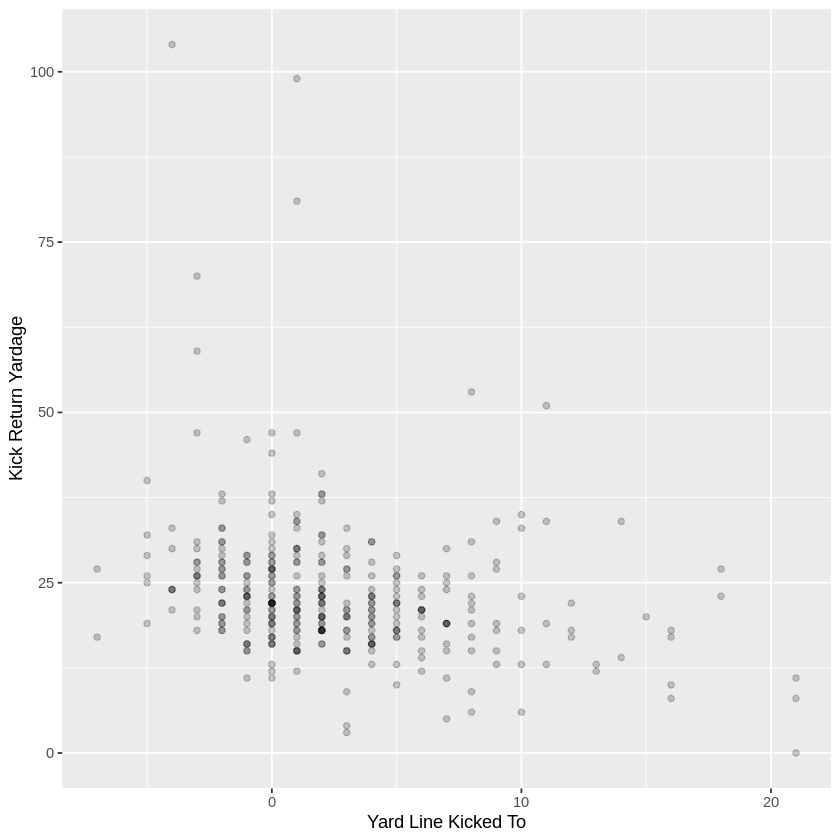

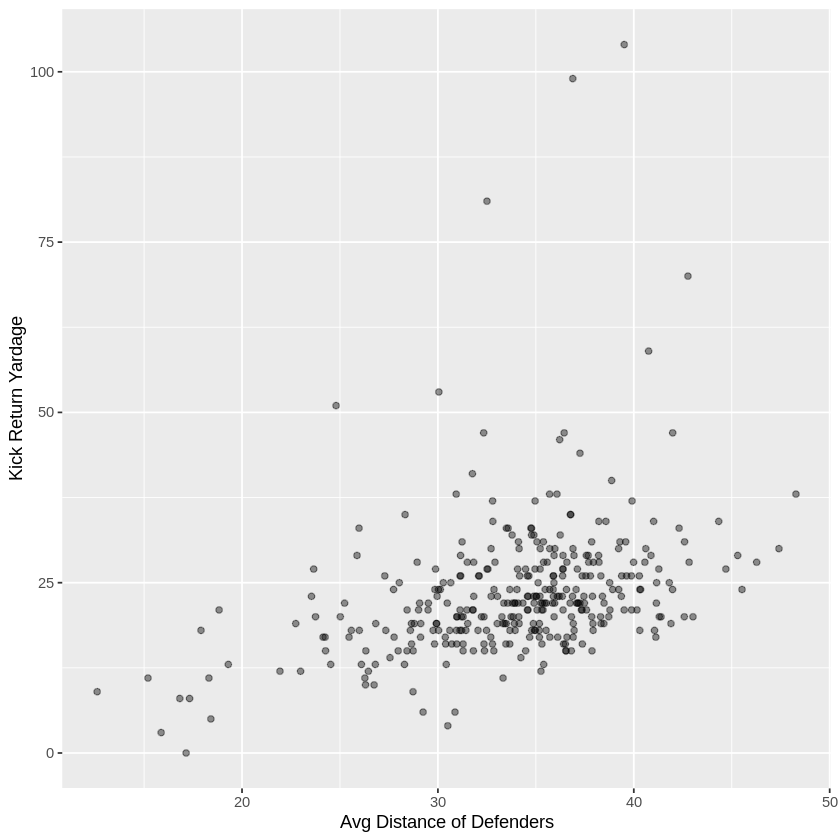

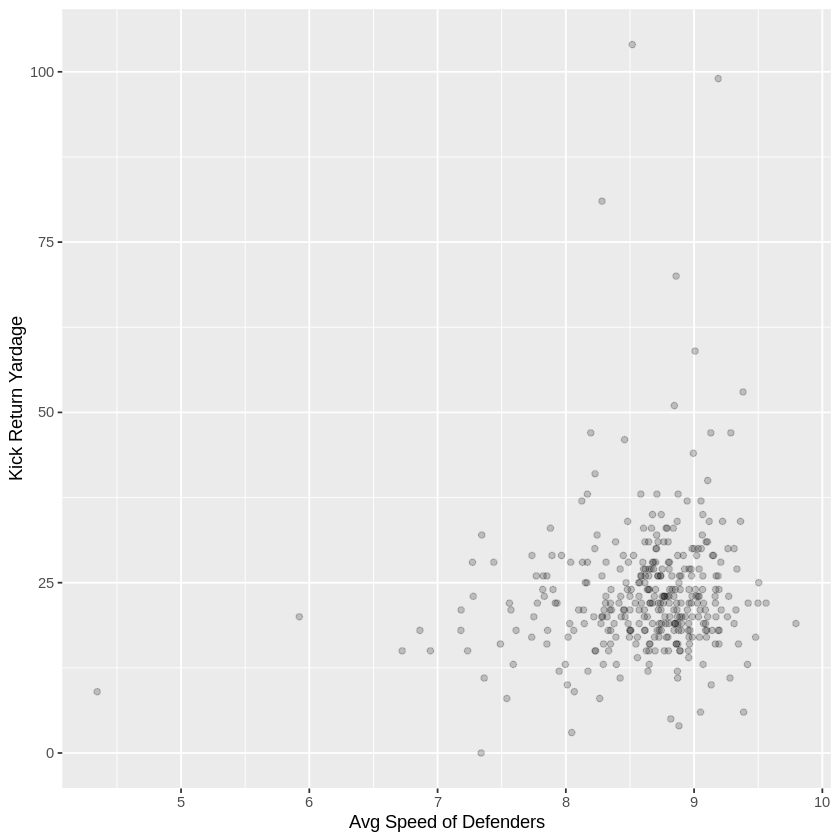

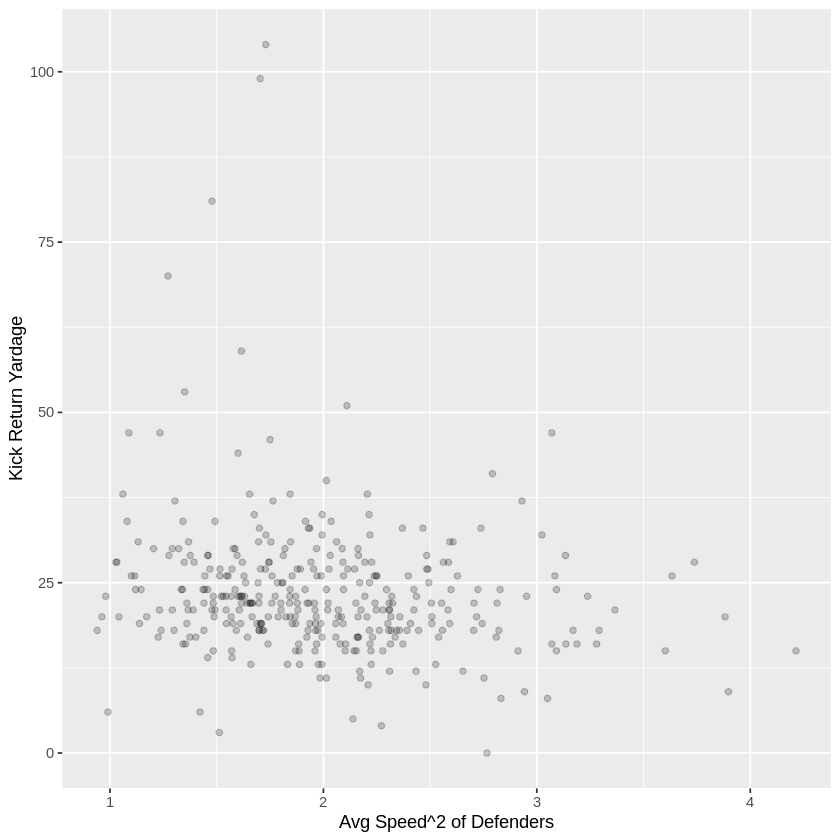

In [49]:
# Visualizing the data

ggplot(data = clean2, aes(x = kickedto_yardline, y = kickReturnYardage)) + 
  geom_point(alpha = .2) + 
  labs( x = 'Yard Line Kicked To', y = 'Kick Return Yardage')

ggplot(data = clean, aes(x = KoTeamAvgDist, y = kickReturnYardage)) + 
  geom_point(alpha = .10) + 
  labs( x = 'Avg Distance of Defenders', y = 'Kick Return Yardage')
  
ggplot(data = clean2, aes(x = KoTeamAvgSpeed, y = kickReturnYardage)) + 
  geom_point(alpha = .20) +
  labs( x = 'Avg Speed of Defenders', y = 'Kick Return Yardage')
  
ggplot(data = clean2, aes(x = KoTeamAvgA, y = kickReturnYardage)) + 
  geom_point(alpha = .20) +
  labs( x = 'Avg Speed^2 of Defenders', y = 'Kick Return Yardage')

Next, I am creating a plot to show the frequency of where the ball was kicked to.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


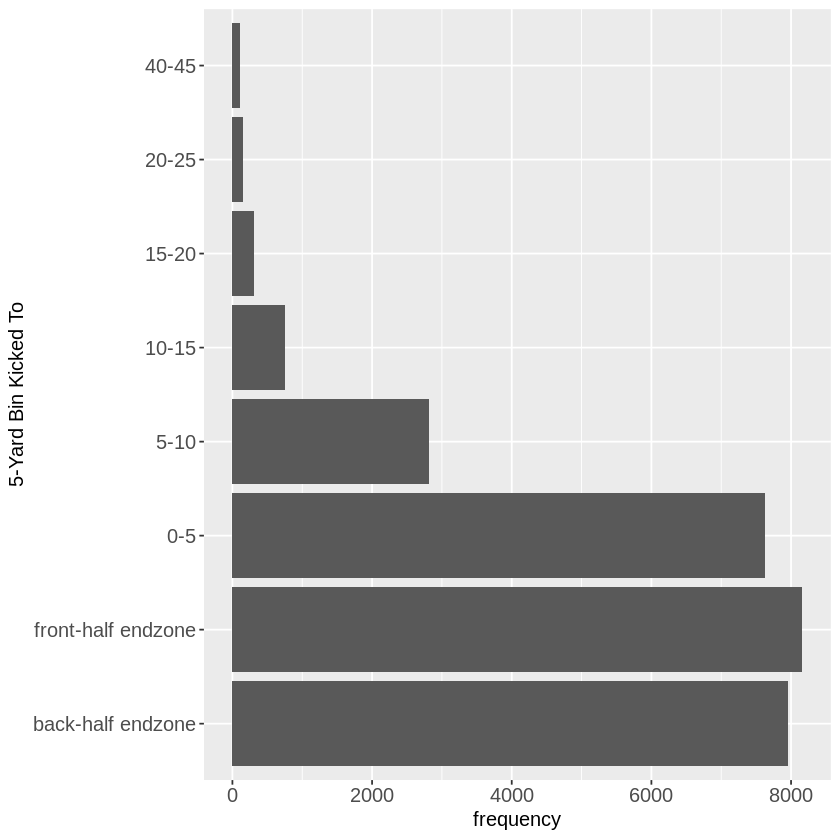

In [53]:
ggplot(kickoffs, aes(x = kickedto_5yardBin)) +
  geom_histogram(stat = "count") + 
  coord_flip() + 
  xlab('5-Yard Bin Kicked To') +
  ylab('frequency') + 
  theme(axis.text=element_text(size=12),
        axis.title = element_text(size=12))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


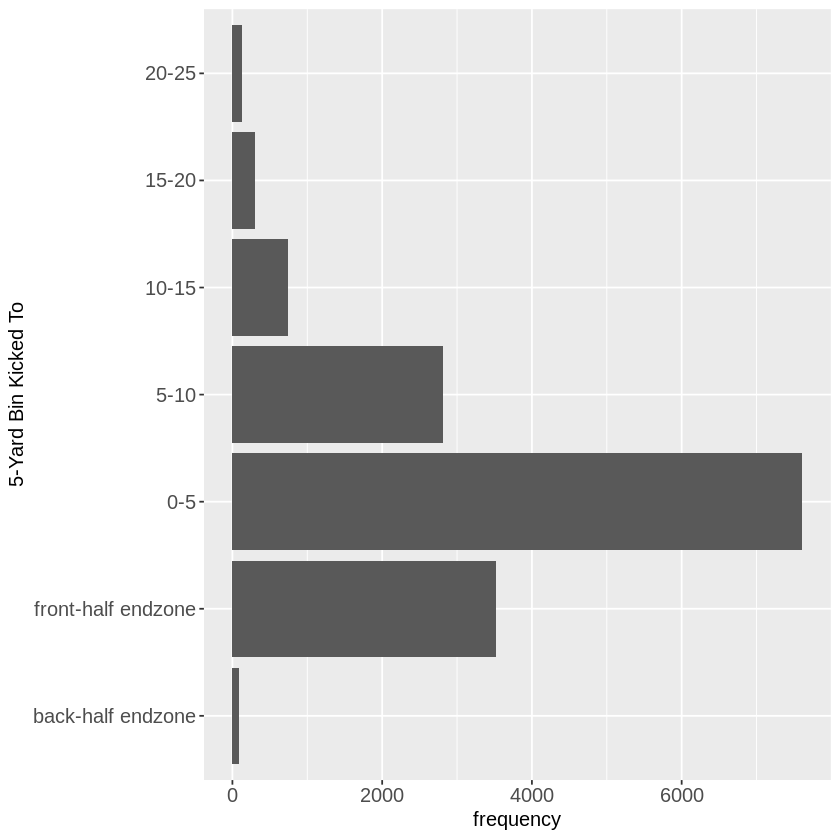

In [54]:
ggplot(returns, aes(x = kickedto_5yardBin)) +
  geom_histogram(stat = "count") + 
  coord_flip() + 
  xlab('5-Yard Bin Kicked To') +
  ylab('frequency') + 
  theme(axis.text=element_text(size=12),
        axis.title = element_text(size=12))

In [55]:
summary(kickoffs$kickedto_yardline)
# On average, every kickoff landed roughly 1 yard past the endzone (-1.577)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-10.000  -7.000  -2.000  -1.577   2.000  40.000 

In [56]:
summary(returns$yard_result)
# The average kickoff return is 25.4 yards. Barely above the touchback placement (25yd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    20.0    24.0    25.4    29.0   100.0 

Warning message in pal_name(palette, type):
“Unknown palette viridisLite”


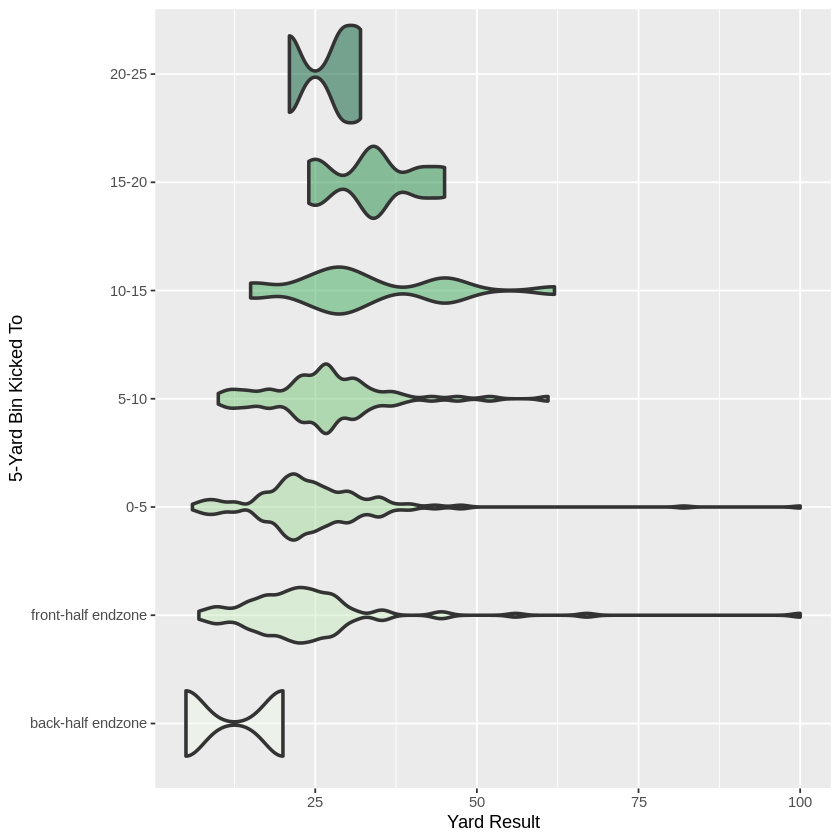

In [59]:
g <- ggplot(returns, aes(x = kickedto_5yardBin, y = yard_result, size = kickedto_5yardBin)) + 
     labs(x = '5-Yard Bin Kicked To', y = 'Yard Result')

#Since Boxplots are boring, I made a violin plot instead
g + geom_violin(aes(fill = kickedto_5yardBin), size = 1, alpha = .5) +
  scale_fill_brewer(palette = "viridisLite", guide = "none") +
  coord_flip()

In [75]:
# Creating a split with 75% of the data in the training set
df_split <- initial_split(clean2, prop = .75)
df_train <- training(df_split)
df_test <- testing(df_split)

mod1 <- lm(kickReturn ~ kickedto_yardline + KoTeamAvgDist + KoTeamAvgX + y.x,
data  = clean2)

# Generating in-sample (training) predictions
preds_test <- predict(mod1, newdata = df_test)

# Generating out-of-sample (testing) predictions
preds_train <- predict(mod1, newdata = df_train)

# Mean Squared Error
get_rmse <- function(true, predictions){
  sqrt(mean((true - predictions)^2))
}


get_rmse(df_train$yard_result, preds_train)
get_rmse(df_test$yard_result, preds_test)

# Test Error > Training Error means model is overfit 
# Test Error < Training Error means model is underfit
# We want test error to ~ training 

[1] 10.93894

[1] 9.653149

In [61]:
summary(preds_train)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.204  21.495  24.002  23.526  26.252  33.261 

In [76]:
mod2 <- lm(kickReturnYardage ~ kickedto_yardline + KoTeamAvgDist + KoTeamAvgA + Y_position + kickType + specialTeamsResult,
           data = clean2)


summary(mod2)
tab_model(mod2)

summary(clean2$KoTeamAvgSpeed)


Call:
lm(formula = kickReturnYardage ~ kickedto_yardline + KoTeamAvgDist + 
    KoTeamAvgA + Y_position + kickType + specialTeamsResult, 
    data = clean2)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.529  -5.176  -1.847   2.765  73.994 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)              -1.380991   8.704727  -0.159  0.87404   
kickedto_yardline        -0.095637   0.171557  -0.557  0.57758   
KoTeamAvgDist             0.545691   0.177792   3.069  0.00232 **
KoTeamAvgA                0.003368   1.222566   0.003  0.99780   
Y_positionleft           -3.258977   1.487586  -2.191  0.02916 * 
Y_positionright          -2.818115   1.497150  -1.882  0.06066 . 
kickTypeF                -2.218807   3.408138  -0.651  0.51547   
kickTypeP                -0.796027   2.493031  -0.319  0.74970   
specialTeamsResultReturn  9.437118   4.661349   2.025  0.04371 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

ERROR: ignored

In [73]:
logit1 <- glm(YardResult_over25 ~ kickedto_yardline + hangTime + returnDirectionActual,  
           family = binomial,
           data = receivedJoin)

summary(logit1)


Call:
glm(formula = YardResult_over25 ~ kickedto_yardline + hangTime + 
    returnDirectionActual, family = binomial, data = receivedJoin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7766  -1.0697  -0.8182   1.1759   1.6308  

Coefficients:
                        Estimate Std. Error z value             Pr(>|z|)    
(Intercept)             1.817532   0.597985   3.039              0.00237 ** 
kickedto_yardline       0.120831   0.008504  14.208 < 0.0000000000000002 ***
hangTime               -0.594111   0.150706  -3.942            0.0000807 ***
returnDirectionActualL  0.089261   0.084199   1.060              0.28909    
returnDirectionActualR  0.353141   0.084669   4.171            0.0000303 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5049.5  on 3651  degrees of freedom
Residual deviance: 4771.7  on 3647  degrees of freedom
  (121 observations deleted due t

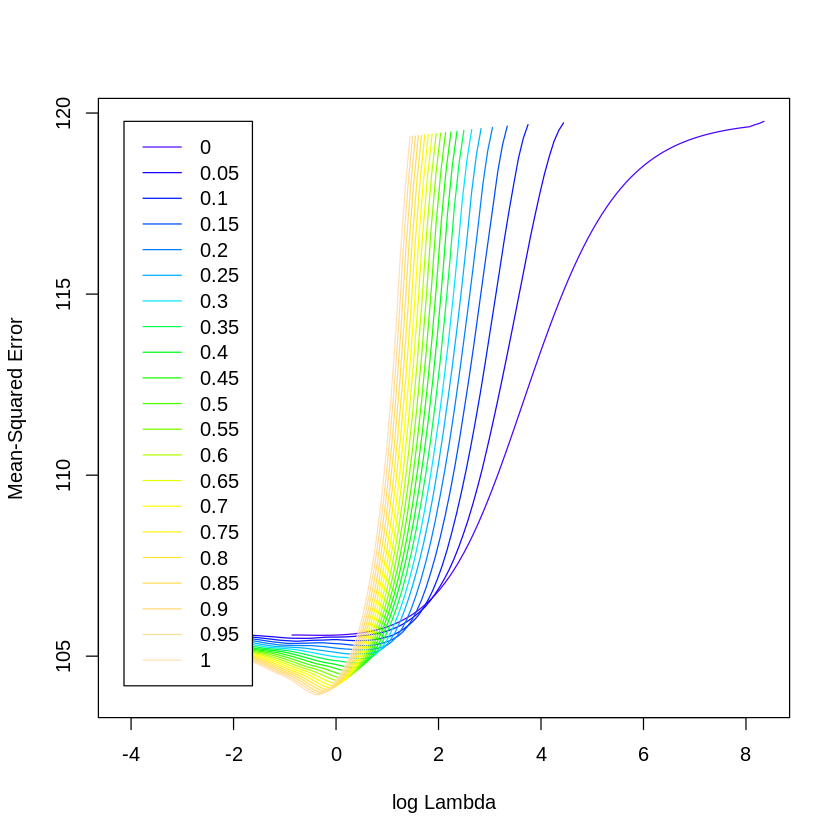

In [91]:
enet_mod <- cva.glmnet(kickReturnYardage ~ kickedto_yardline + x.x  + y.x + KoTeamAvgDist,
     data = df_train,
     alpha = seq(0,1, by = 0.05))

plot(enet_mod)

List of 21
 $ :List of 12
  ..$ lambda    : num [1:100] 4237 3861 3518 3206 2921 ...
  ..$ cvm       : num [1:100] 120 120 120 120 120 ...
  ..$ cvsd      : num [1:100] 39.1 39.1 39.1 39 39 ...
  ..$ cvup      : num [1:100] 159 159 159 159 159 ...
  ..$ cvlo      : num [1:100] 80.7 80.7 80.6 80.6 80.6 ...
  ..$ nzero     : Named int [1:100] 4 4 4 4 4 4 4 4 4 4 ...
  .. ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
  ..$ call      : language glmnet::cv.glmnet(x = x, y = y, weights = ..1, offset = ..2, nfolds = nfolds,      foldid = foldid, alpha = a)
  ..$ name      : Named chr "Mean-Squared Error"
  .. ..- attr(*, "names")= chr "mse"
  ..$ glmnet.fit:List of 12
  .. ..$ a0       : Named num [1:100] 23.7 23.6 23.6 23.6 23.6 ...
  .. .. ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
  .. ..$ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. ..@ i       : int [1:400] 0 1 2 3 0 1 2 3 0 1 ...
  .. .. .. ..@ p       : int [1:101] 0 4 8 12 16

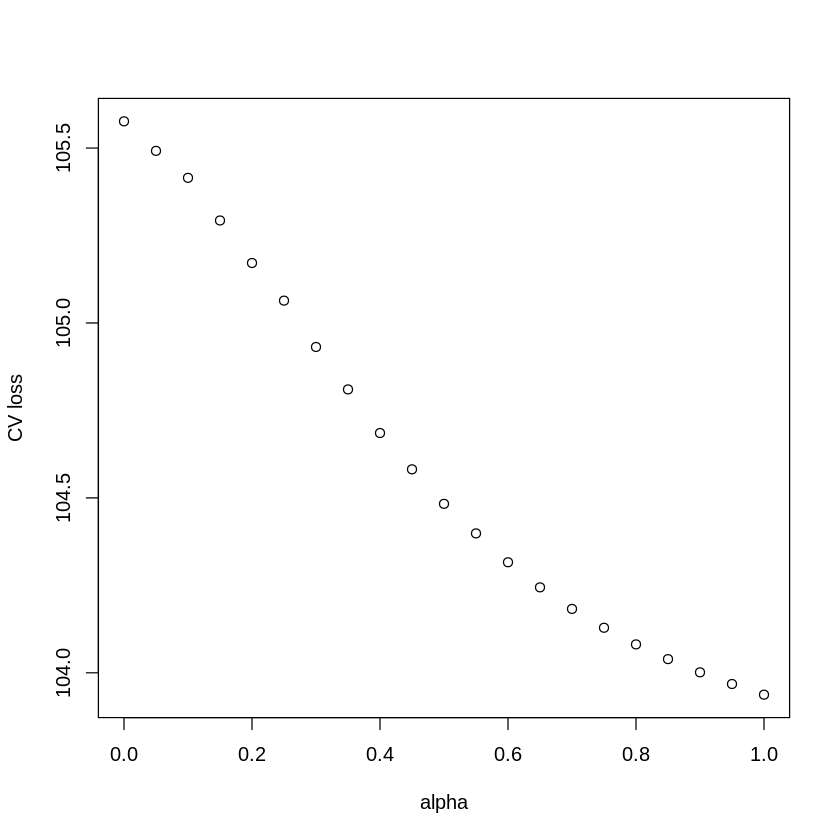

In [92]:
# now enet_mod holds a list with all of the sub models, 
# each with alpha = whatever sequence the model was estimated with

minlossplot(enet_mod, 
            cv.type = "min")


str(enet_mod$modlist)

In [87]:
# Use this function to find the best alpha
get_alpha <- function(fit) {
  alpha <- fit$alpha
  error <- sapply(fit$modlist, 
                  function(mod) {min(mod$cvm)})
  alpha[which.min(error)]
}

In [88]:
# Get all parameters.
get_model_params <- function(fit) {
  alpha <- fit$alpha
  lambdaMin <- sapply(fit$modlist, `[[`, "lambda.min")
  lambdaSE <- sapply(fit$modlist, `[[`, "lambda.1se")
  error <- sapply(fit$modlist, function(mod) {min(mod$cvm)})
  best <- which.min(error)
  data.frame(alpha = alpha[best], lambdaMin = lambdaMin[best],
             lambdaSE = lambdaSE[best], eror = error[best])
}

In [89]:
# extract the best alpha value and model parameters
best_alpha <- get_alpha(enet_mod)
print(best_alpha)
get_model_params(enet_mod)

[1] 1


alpha,lambdaMin,lambdaSE,eror
<dbl>,<dbl>,<dbl>,<dbl>
1,0.5472939,4.237498,102.8762


In [90]:
# extract the best model object
best_mod <- enet_mod$modlist[[which(enet_mod$alpha == best_alpha)]]

print(best_mod)


Call:  glmnet::cv.glmnet(x = x, y = y, weights = ..1, offset = ..2,      nfolds = nfolds, foldid = foldid, alpha = a) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  0.547    23   102.9 27.15       1
1se  4.237     1   119.2 30.07       0


In [93]:
# Let's see how well our predictions do. 
logit_preds_train <- predict(logit, newdata = df_train)

logit_preds_test <- predict(logit, newdata = df_test)

head(logit_preds_test)
head(logit_preds_train)

1          2          3          4          5          6 
-0.1904788 -0.5270536 -0.1348562  0.9426613 -1.0224024 -0.8360755

1          2          3          4          5          6 
 2.4242584 -0.9470323 -0.3211832  0.4493209  0.2551886 -1.0125286

In [96]:
# Generating results dataframes. 

results_train <- data.frame( `truth`= df_train %>% 
                               select(YardResult_over25) %>% 
                               mutate(YardResult_over25 = as.numeric(YardResult_over25)),
                               `Class1` =  logit_preds_train,
                               `type` = rep("train", length(logit_preds_train))
)

results_test <- data.frame(
    `truth` = df_test %>% 
    select(YardResult_over25) %>% 
    mutate(YardResult_over25 = as.numeric(YardResult_over25)),
    `Class1` =  logit_preds_test,
    `type` = rep("test",length(logit_preds_test))
)

results <- bind_rows(results_train, results_test)

slice(results)

Adding missing grouping variables: `displayName.x`, `gameId`, `playId`
Adding missing grouping variables: `displayName.x`, `gameId`, `playId`


,truth.displayName.x,truth.gameId,truth.playId,truth.YardResult_over25,Class1,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1...1,Chris Herndon,2018123006,2312,2,2.424258393,train
2...2,Brandon Wilson,2020122706,2718,1,-0.947032256,train
3...3,Boston Scott,2019122911,36,1,-0.321183192,train
4...4,Ashton Dulin,2020122709,988,1,0.449320913,train
5...5,Corey Coleman,2018123008,2797,2,0.255188575,train
6...6,Michael Walker,2019122205,2081,1,-1.012528595,train
7...7,Kalif Raymond,2019122210,3262,1,-0.903580207,train
8...8,Rashard Higgins,2019122206,2220,1,1.231791375,train
9...9,D'Ernest Johnson,2021010304,2225,2,0.003569419,train


Warning message in verify_d(data$d):
“D not labeled 0/1, assuming 1 = 0 and 2 = 1!”
Warning message in verify_d(data$d):
“D not labeled 0/1, assuming 1 = 0 and 2 = 1!”


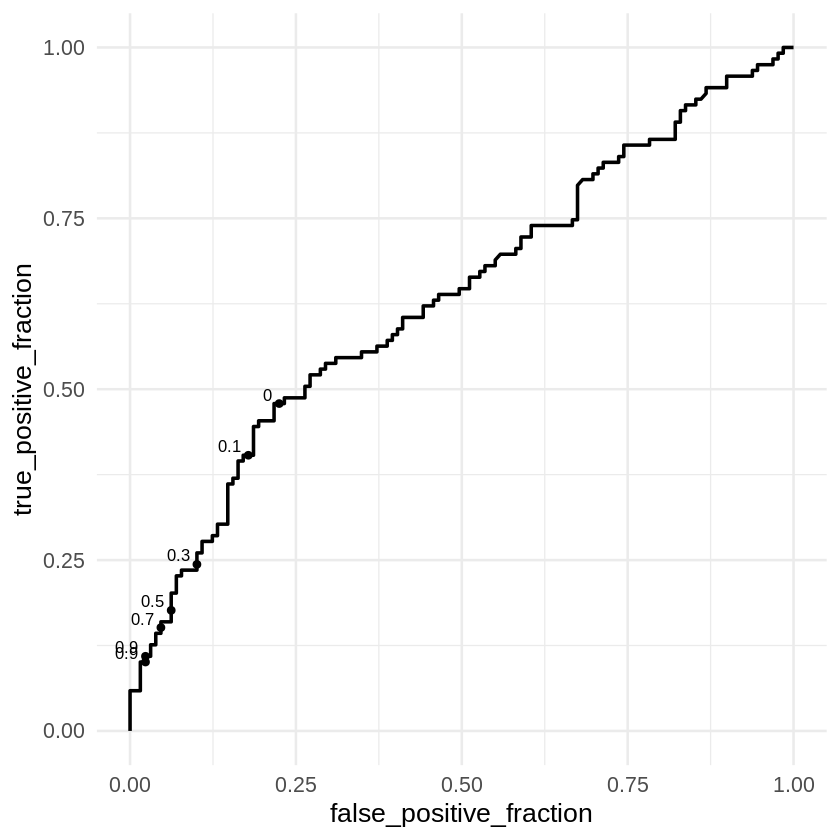

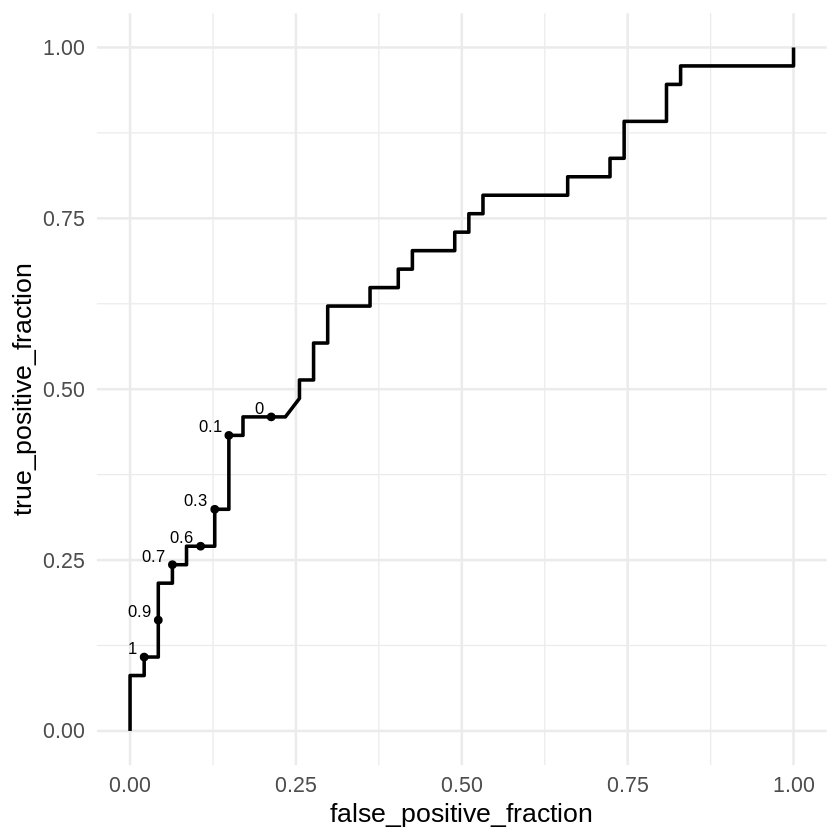

In [98]:
# Generating ROC Plots for both training and test sets

p_train <- ggplot(results_train,
            aes(m=Class1, d = truth.YardResult_over25)) +
    geom_roc(labelsize = 3.5, 
             cutoffs.at = c(0.99,0.9,0.7,0.5,0.3,0.1,0)) +
  theme_minimal(base_size = 16)

p_test <- ggplot(results_test,
            aes(m=Class1, d = truth.YardResult_over25)) +
    geom_roc(labelsize = 3.5, 
             cutoffs.at = c(0.99,0.9,0.7,0.5,0.3,0.1,0)) +
  theme_minimal(base_size = 16)

print(p_train)
print(p_test)

In [99]:
# Calculating the Area Under the Curve (AUC)

calc_auc(p_train)
calc_auc(p_test) 

Warning message in verify_d(data$d):
“D not labeled 0/1, assuming 1 = 0 and 2 = 1!”


PANEL,group,AUC
<fct>,<int>,<dbl>
1,-1,0.6343235


Warning message in verify_d(data$d):
“D not labeled 0/1, assuming 1 = 0 and 2 = 1!”


PANEL,group,AUC
<fct>,<int>,<dbl>
1,-1,0.6742381
